In [26]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("master_report_streeteasy/rentals/All/medianAskingRent_All.csv")

In [5]:
df.columns

Index(['areaName', 'Borough', 'areaType', '2010-01', '2010-02', '2010-03',
       '2010-04', '2010-05', '2010-06', '2010-07',
       ...
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10'],
      dtype='object', length=109)

In [6]:
df.shape

(202, 109)

In [7]:
df.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3050.0,3100.0,3100.0,3200.0,3195.0,...,3650.0,3750.0,3735.0,3750.0,3827.0,3800.0,3795.0,3800.0,3850.0,3850.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3400.0,3392.0,3450.0,3500.0,3525.0,3550.0,3550.0,3573.0,3595.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2929.0,2900.0,2869.0,2850.0,2850.0,2900.0,2950.0,2900.0,2900.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2261.0,2291.0,2300.0,2350.0,2375.0,2395.0,2425.0,2400.0,2350.0,2350.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3350.0,3290.0,3250.0,3290.0,3300.0,3350.0,3350.0,3348.0,3400.0,3400.0


In [8]:
df.Borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', nan, 'Staten Island'],
      dtype=object)

In [70]:
df.areaName.unique()

array(['All Downtown', 'All Midtown', 'All Upper East Side',
       'All Upper Manhattan', 'All Upper West Side', 'Alley Park',
       'Astoria', 'Auburndale', 'Bath Beach', 'Battery Park City',
       'Bay Ridge', 'Baychester', 'Bayside', 'Bedford Park',
       'Bedford-Stuyvesant', 'Bellerose', 'Belmont', 'Bensonhurst',
       'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Bowne Park',
       'Briarwood', 'Brighton Beach', 'Bronx', 'Bronxwood', 'Brooklyn',
       'Brooklyn Heights', 'Brookville', 'Brownsville', 'Bushwick',
       'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
       'Central Harlem', 'Central Park South', 'Central Queens',
       'Chelsea', 'Chinatown', 'City Island', 'Civic Center', 'Clearview',
       'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point',
       'Columbia St Waterfront District', 'Concourse', 'Coney Island',
       'Corona', 'Country Club', 'Crotona Park East', 'Crown Heights',
       'DUMBO', 'Ditmas Park', 'Douglaston', 

In [14]:
df.set_index(["Borough", "areaName"]).sort_index()

areaType  2010-01  2010-02  2010-03  \
Borough       areaName                                                       
Bronx         Baychester           neighborhood      NaN      NaN      NaN   
              Bedford Park         neighborhood      NaN      NaN      NaN   
              Belmont              neighborhood      NaN      NaN      NaN   
              Bronx                     borough   1600.0   1600.0   1508.0   
              Bronxwood            neighborhood      NaN      NaN      NaN   
              Castle Hill          neighborhood      NaN      NaN      NaN   
              City Island          neighborhood      NaN      NaN      NaN   
              Co-op City           neighborhood      NaN      NaN      NaN   
              Concourse            neighborhood      NaN      NaN      NaN   
              Country Club         neighborhood      NaN      NaN      NaN   
              Crotona Park East    neighborhood      NaN      NaN      NaN   
              East Tremont         neighborhood      NaN      NaN      NaN   
              Eastchester          neighborhood      NaN      NaN      NaN   
              Edenwald             neighborhood      NaN      NaN      NaN   
              Fordham              neighborhood      NaN      NaN      NaN   
              Highbridge           neighborhood      NaN      NaN   1125.0   
              Hunts Point          neighborhood      NaN      NaN      NaN   
              Kingsbridge          neighborhood   1184.0   1193.0   1300.0   
              Laconia              neighborhood      NaN      NaN      NaN   
              Longwood             neighborhood      NaN      NaN      NaN   
              Melrose              neighborhood      NaN      NaN      NaN   
              Morris Heights       neighborhood      NaN      NaN      NaN   
              Morris Park          neighborhood      NaN      NaN      NaN   
              Morrisania           neighborhood      NaN      NaN      NaN   
              Mott Haven           neighborhood      NaN      NaN      NaN   
              Norwood              neighborhood      NaN      NaN      NaN   
              Parkchester          neighborhood      NaN      NaN      NaN   
              Pelham Bay           neighborhood      NaN      NaN      NaN   
              Pelham Gardens       neighborhood      NaN      NaN      NaN   
              Pelham Parkway       neighborhood      NaN      NaN      NaN   
...                                         ...      ...      ...      ...   
Queens        Middle Village       neighborhood      NaN      NaN      NaN   
              New Hyde Park        neighborhood      NaN      NaN      NaN   
              North Corona         neighborhood      NaN      NaN      NaN   
              Northeast Queens        submarket   1650.0   1600.0   1625.0   
              Northwest Queens        submarket   1800.0   1817.0   1944.0   
              Oakland Gardens      neighborhood      NaN      NaN      NaN   
              Ozone Park           neighborhood      NaN      NaN      NaN   
              Pomonok              neighborhood      NaN      NaN      NaN   
              Queens                    borough   1655.0   1675.0   1700.0   
              Queens Village       neighborhood      NaN      NaN      NaN   
              Queensboro Hill      neighborhood      NaN      NaN      NaN   
              Rego Park            neighborhood   1375.0   1400.0   1425.0   
              Richmond Hill        neighborhood      NaN      NaN      NaN   
              Ridgewood            neighborhood      NaN      NaN      NaN   
              Rockaway All         neighborhood      NaN      NaN      NaN   
              Rosedale             neighborhood      NaN      NaN      NaN   
              South Jamaica        neighborhood      NaN      NaN      NaN   
              South Ozone Park     neighborhood      NaN      NaN      NaN   
              South Queens            submarket      NaN     

In [19]:
df_man_multi = df[df.Borough == 'Manhattan'].set_index(["Borough", "areaName"]).sort_index()
df_man_multi

areaType  2010-01  2010-02  2010-03  \
Borough   areaName                                                       
Manhattan All Downtown            submarket   3200.0   3200.0   3050.0   
          All Midtown             submarket   2895.0   2800.0   2800.0   
          All Upper East Side     submarket   2469.0   2450.0   2400.0   
          All Upper Manhattan     submarket   1825.0   1800.0   1795.0   
          All Upper West Side     submarket   2895.0   2800.0   2750.0   
          Battery Park City    neighborhood   3495.0   3346.0   3268.0   
          Central Harlem       neighborhood   1990.0   1993.0   1895.0   
          Central Park South   neighborhood   6000.0   6000.0   5950.0   
          Chelsea              neighborhood   3200.0   3400.0   3245.0   
          Chinatown            neighborhood   2900.0   2900.0   2550.0   
          Civic Center         neighborhood      NaN      NaN      NaN   
          East Harlem          neighborhood   1850.0   1888.0   1880.0   
          East Village         neighborhood   2500.0   2500.0   2400.0   
          Financial District   neighborhood   3198.0   3100.0   3015.0   
          Flatiron             neighborhood   4270.0   4050.0   3750.0   
          Gramercy Park        neighborhood   3100.0   3000.0   2995.0   
          Greenwich Village    neighborhood   3200.0   3200.0   2979.0   
          Hamilton Heights     neighborhood   1650.0   1700.0   1688.0   
          Inwood               neighborhood   1400.0   1395.0   1395.0   
          Little Italy         neighborhood   3295.0   3050.0   3000.0   
          Lower East Side      neighborhood   2295.0   2250.0   2295.0   
          Manhattan                 borough   2800.0   2795.0   2728.0   
          Manhattanville       neighborhood      NaN      NaN      NaN   
          Marble Hill          neighborhood      NaN      NaN      NaN   
          Midtown              neighborhood   3800.0   3900.0   3925.0   
          Midtown East         neighborhood   2695.0   2625.0   2650.0   
          Midtown South        neighborhood   3173.0   3000.0   3200.0   
          Midtown West         neighborhood   2600.0   2650.0   2650.0   
          Morningside Heights  neighborhood   2200.0   2150.0   2100.0   
          Nolita               neighborhood   3248.0   2825.0   3195.0   
          Roosevelt Island     neighborhood   2577.0   2555.0   2404.0   
          Soho                 neighborhood   5200.0   5288.0   5275.0   
          Stuyvesant Town/PCV  neighborhood      NaN      NaN      NaN   
          Tribeca              neighborhood   6500.0   6773.0   6500.0   
          Upper East Side      neighborhood   2469.0   2450.0   2400.0   
          Upper West Side      neighborhood   2895.0   2800.0   2750.0   
          Washington Heights   neighborhood   1550.0   1545.0   1597.0   
          West Harlem          neighborhood   1795.0      NaN      NaN   
          West Village         neighborhood   3265.0   3395.0   3113.0   

                               2010-04  2010-05  2010-06  2010-07  2010-08  \
Borough   areaName                                                           
Manhattan All Downtown          3100.0   3100.0   3200.0   3195.0   3200.0   
          All Midtown           2850.0   2900.0   2950.0   3000.0   3000.0   
          All Upper East Side   2500.0   2550.0   2550.0   2595.0   2500.0   
          All Upper Manhattan   1800.0   1823.0   1850.0   1875.0   1850.0   
          All Upper West Side   2800.0   2798.0   2795.0   2800.0   2895.0   
          Battery Park City     3295.0   3100.0   3395.0   3200.0   3225.0   
          Central Harlem        1898.0   1900.0   1950.0   1850.0   1800.0   
          Central Park South    6500.0   6200.0   5800.0   5575.0   6100.0   
          Chelsea               3200.0   3200.0   3395.0   3400.0   3450.0   
          Chinatown             2200.0   2200.0   2248.0   2500.0   2700.0   
          Civic Center             NaN      NaN      NaN      Na

In [20]:
df_man_multi.corr()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
2010-01,1.000000,0.994194,0.993167,0.984340,0.974565,0.968018,0.969577,0.945746,0.935306,0.930504,...,0.960418,0.958602,0.966827,0.952549,0.954950,0.949083,0.943628,0.945312,0.945577,0.946608
2010-02,0.994194,1.000000,0.993311,0.982006,0.969904,0.966879,0.966017,0.926438,0.920295,0.919365,...,0.961212,0.961561,0.966540,0.950507,0.949440,0.944320,0.936216,0.947108,0.944430,0.941176
2010-03,0.993167,0.993311,1.000000,0.991856,0.978740,0.972842,0.966512,0.937193,0.927456,0.931359,...,0.965679,0.965627,0.970587,0.954966,0.950603,0.944946,0.941846,0.950528,0.946321,0.946999
2010-04,0.984340,0.982006,0.991856,1.000000,0.989937,0.980988,0.972794,0.955418,0.923303,0.920676,...,0.971864,0.968660,0.979740,0.969682,0.958764,0.957230,0.957178,0.957556,0.956540,0.962439
2010-05,0.974565,0.969904,0.978740,0.989937,1.000000,0.994414,0.980360,0.954306,0.893148,0.879425,...,0.960705,0.950458,0.968933,0.961724,0.955176,0.967207,0.956286,0.949021,0.953120,0.959489
2010-06,0.968018,0.966879,0.972842,0.980988,0.994414,1.000000,0.974014,0.937113,0.864418,0.853067,...,0.955505,0.943271,0.960933,0.956606,0.956639,0.972338,0.956201,0.953688,0.954100,0.955165
2010-07,0.969577,0.966017,0.966512,0.972794,0.980360,0.974014,1.000000,0.968598,0.929402,0.896699,...,0.929724,0.919255,0.947943,0.947095,0.934909,0.943752,0.924669,0.920779,0.918511,0.933219
2010-08,0.945746,0.926438,0.937193,0.955418,0.954306,0.937113,0.968598,1.000000,0.949447,0.907687,...,0.919439,0.911910,0.939229,0.941577,0.925978,0.922265,0.919455,0.902052,0.903955,0.925643
2010-09,0.935306,0.920295,0.927456,0.923303,0.893148,0.864418,0.929402,0.949447,1.000000,0.978161,...,0.873336,0.880479,0.902934,0.898221,0.872294,0.846562,0.854739,0.850160,0.846191,0.869539
2010-10,0.930504,0.919365,0.931359,0.920676,0.879425,0.853067,0.896699,0.907687,0.978161,1.000000,...,0.889193,0.907123,0.908500,0.894388,0.875047,0.839982,0.861221,0.866728,0.856615,0.874418


In [30]:
df[df.Borough == 'Manhattan'][df.areaName == "Chelsea"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
38,Chelsea,Manhattan,neighborhood,3200.0,3400.0,3245.0,3200.0,3200.0,3395.0,3400.0,...,3945.0,4000.0,4000.0,3995.0,3998.0,4010.0,4000.0,4100.0,4163.0,4137.0


In [48]:
def make_neighborhood_lineplot(borough, neighborhood):
    """generates a graph of median asking rent vs month from January 2010 to October 2018
    """
    borough = str(borough).title()
    neighborhood = str(neighborhood).title()
    plt.plot(np.linspace(1,105,num=105), df[df.Borough == borough][df.areaName == neighborhood][df.columns[4:]].T)
    plt.xlabel('months since Jan 2010')
    plt.ylabel('median asking price ($)')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


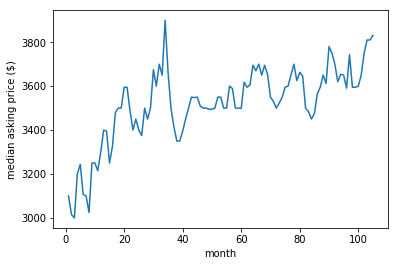

In [49]:
make_neighborhood_lineplot('manhattan', 'financial district')

In [37]:
df[df.Borough == 'Manhattan'][df.areaName == "Chelsea"].shape[1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


109

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


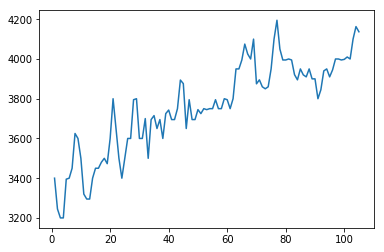

In [35]:
plt.plot(np.linspace(1,105, num=105), df[df.Borough == 'Manhattan'][df.areaName == "Chelsea"][df.columns[4:]].T)


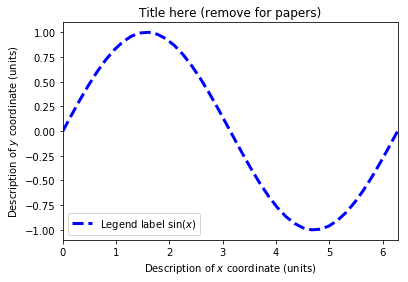

In [34]:
# Silly example data
bp_x = np.linspace(0, 2*np.pi, num=40, endpoint=True)
bp_y = np.sin(bp_x)

# Make the plot
plt.plot(bp_x, bp_y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Title here (remove for papers)")
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.legend(loc="lower left")
plt.show()

In [74]:
list(df[df.Borough == 'Manhattan'].areaName.unique())

['All Downtown',
 'All Midtown',
 'All Upper East Side',
 'All Upper Manhattan',
 'All Upper West Side',
 'Battery Park City',
 'Central Harlem',
 'Central Park South',
 'Chelsea',
 'Chinatown',
 'Civic Center',
 'East Harlem',
 'East Village',
 'Financial District',
 'Flatiron',
 'Gramercy Park',
 'Greenwich Village',
 'Hamilton Heights',
 'Inwood',
 'Little Italy',
 'Lower East Side',
 'Manhattan',
 'Manhattanville',
 'Marble Hill',
 'Midtown',
 'Midtown East',
 'Midtown South',
 'Midtown West',
 'Morningside Heights',
 'Nolita',
 'Roosevelt Island',
 'Soho',
 'Stuyvesant Town/PCV',
 'Tribeca',
 'Upper East Side',
 'Upper West Side',
 'Washington Heights',
 'West Harlem',
 'West Village']

In [ ]:
neighborhood_zipcode_dict = {'Battery Park City':[],
 'Central Harlem': [],
 'Central Park South':[],
 'Chelsea':[],
 'Chinatown':[],
 'Civic Center':[],
 'East Harlem':[],
 'East Village':[],
 'Financial District':[],
 'Flatiron':[],
 'Gramercy Park':[],
 'Greenwich Village':[],
 'Hamilton Heights':[],
 'Inwood':[10034],
 'Little Italy':[],
 'Lower East Side':[],
 'Manhattan':[],
 'Manhattanville':[],
 'Marble Hill':[10463],
 'Midtown':[],
 'Midtown East':[],
 'Midtown South':[],
 'Midtown West':[],
 'Morningside Heights':[],
 'Nolita':[],
 'Roosevelt Island':[],
 'Soho':[],
 'Stuyvesant Town/PCV':[],
 'Tribeca':[],
 'Upper East Side':[],
 'Upper West Side':[],
 'Washington Heights':[],
 'West Harlem':[],
 'West Village':[]}

In [58]:
def draw_multiple_graphs(number_of_graphs):
    for i in range(0,number_of_graphs):
        plt.figure(i)
        plt.title(list(df[df.Borough == 'Manhattan'].areaName.unique())[i])
        make_neighborhood_lineplot("manhattan",list(df[df.Borough == 'Manhattan'].areaName.unique())[i])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ZeroDivisionError: integer division or modulo by zero

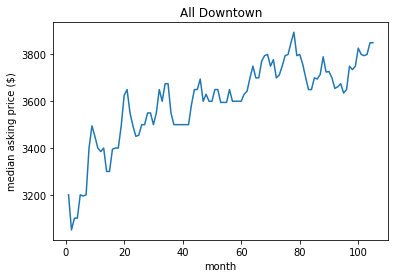

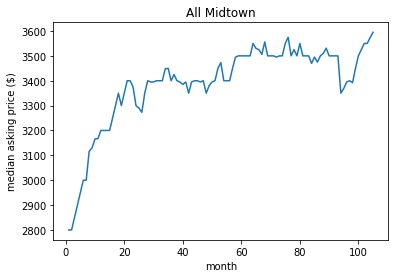

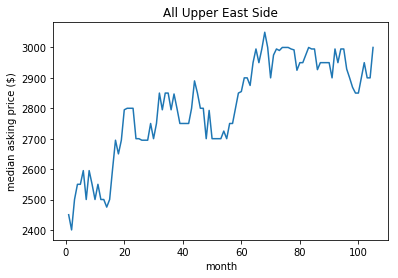

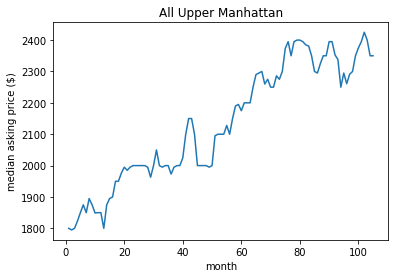

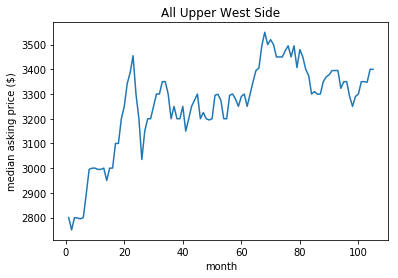

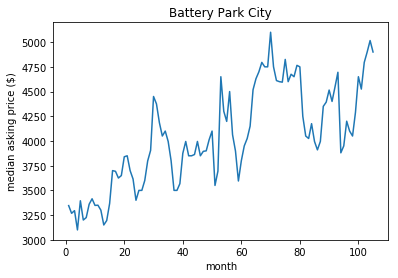

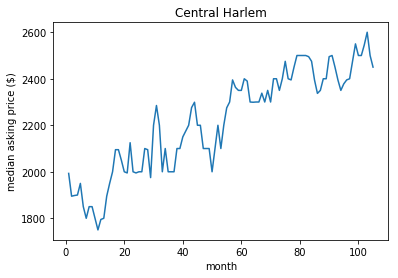

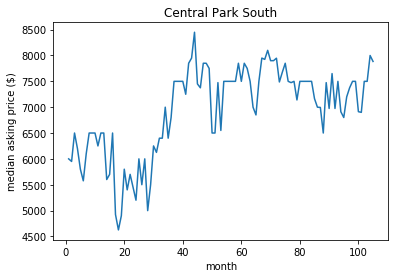

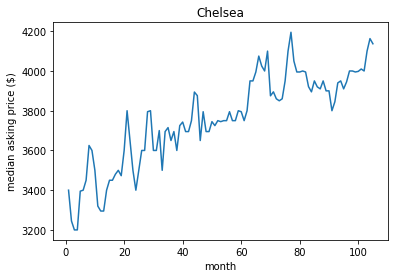

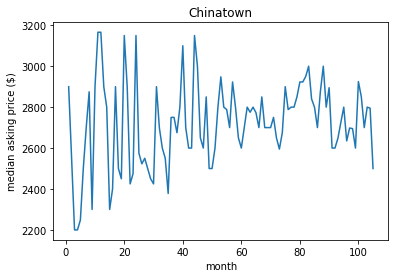

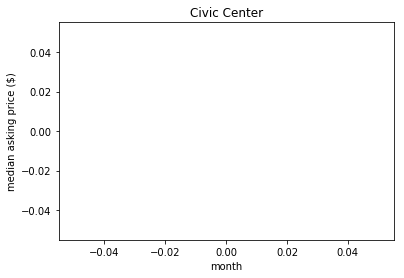

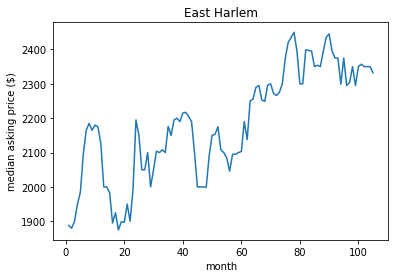

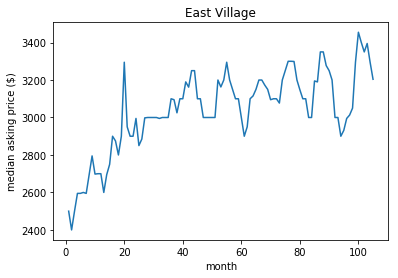

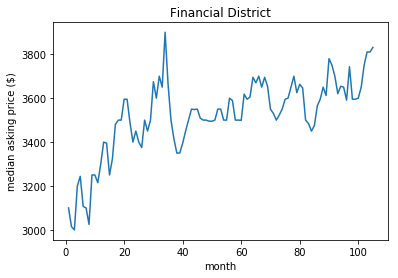

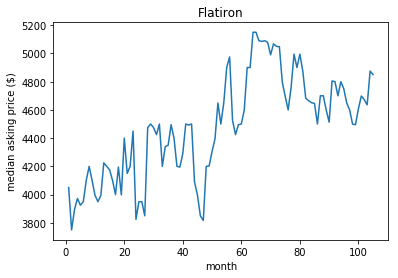

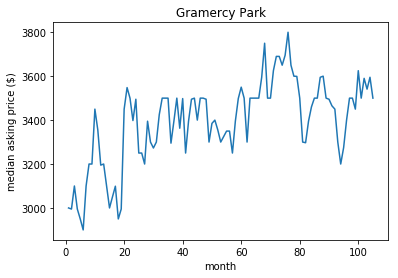

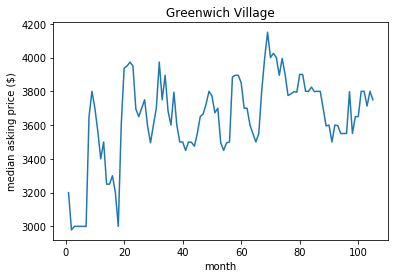

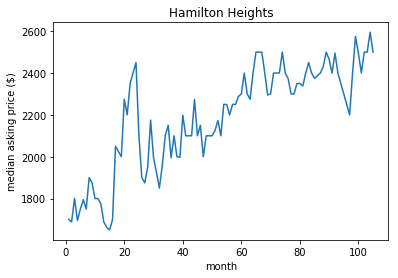

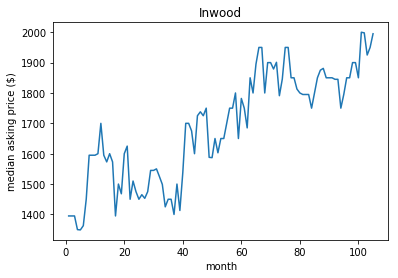

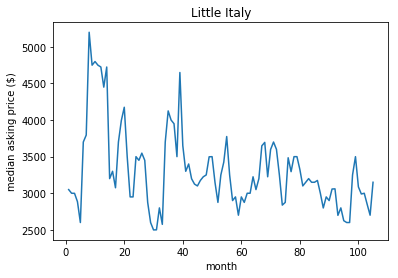

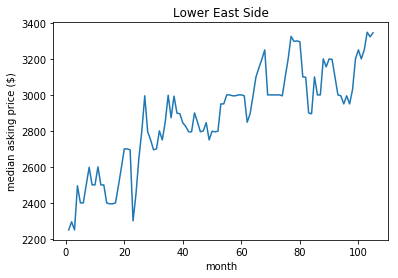

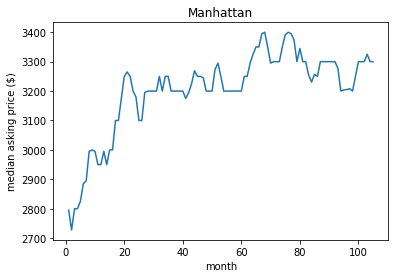

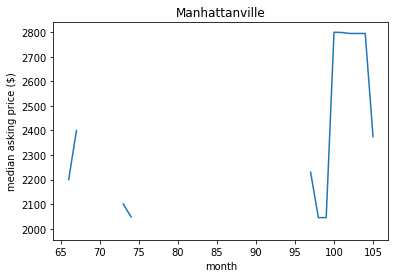

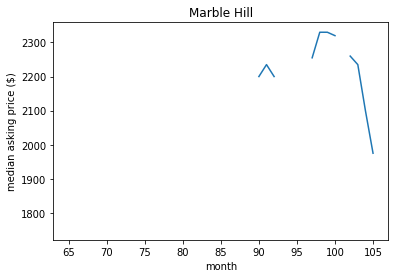

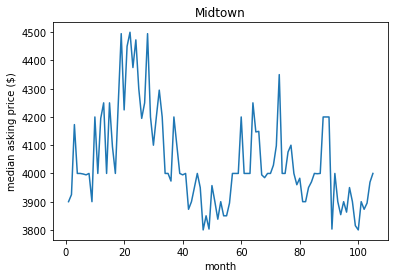

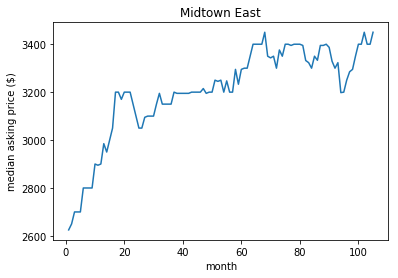

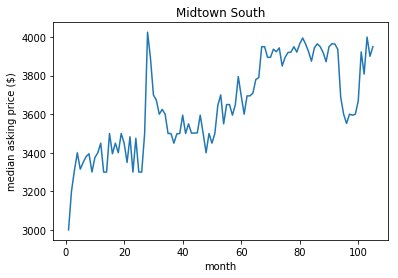

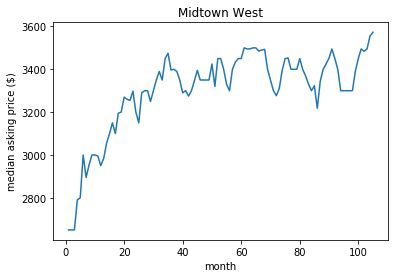

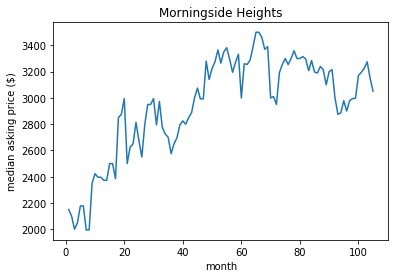

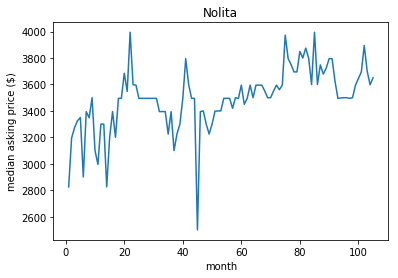

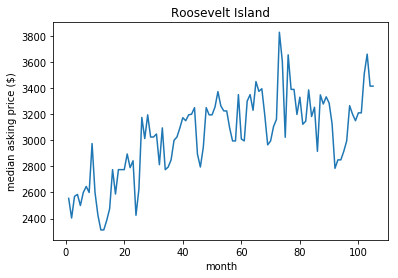

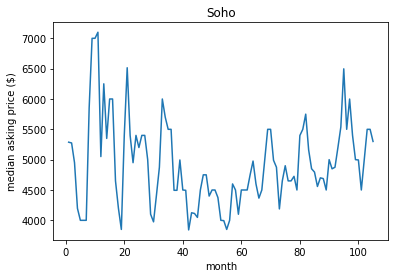

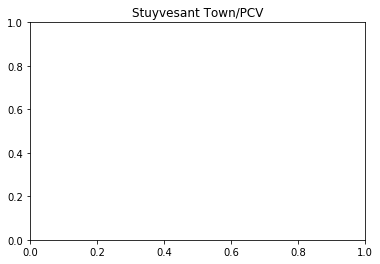

In [59]:
draw_multiple_graphs(109)

In [65]:
def make_neighborhood_lineplot_test(borough, neighborhood):
    """generates a graph of median asking rent vs month from January 2010 to October 2018
    """
    borough = str(borough).title()
    neighborhood = str(neighborhood).title()
    plt.plot(np.linspace(1,105,num=105), df[df.Borough == borough][df.areaName == neighborhood][df.columns[4:]].T)
    plt.xlabel('months since Jan 2010')
    plt.ylabel('median asking price ($)')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


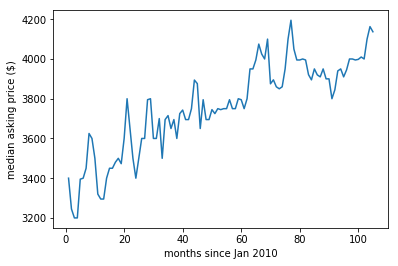

In [66]:
make_neighborhood_lineplot_test('manhattan','chelsea')